<a href="https://colab.research.google.com/github/EugeniaBar/Proyectoscompletos/blob/main/(neumoniaparaestudiar)_de_Nuevo_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #Intro:
Tensorflow biblioteca principal de TensorFlow: Aquí importamos módulos específicos de Keras, que es una API de alto nivel para construir y entrenar modelos en TensorFlow.
Keras hace que sea mucho más fácil diseñar redes neuronales sin tener que lidiar con los detalles de bajo nivel de TensorFlow.

### Sobre métricas para evaluar el rendimiento del modelo.
Las métricas son utilizadas para monitorear el proceso de entrenamiento y evaluar el modelo una vez que está entrenado.

 A diferencia de las funciones de pérdida, las métricas no se usan para el backpropagation (no se optimizan directamente), sino para dar una comprensión más intuitiva del rendimiento del modelo.

AUC (Area Under the Curve): Generalmente se refiere al Área bajo la curva ROC (Receiver Operating Characteristic). Es una métrica de clasificación que evalúa la capacidad de un modelo para distinguir entre clases. Un AUC más cercano a 1.0 indica un mejor rendimiento.

Precision: Mide la proporción de verdaderos positivos entre todas las predicciones positivas (verdaderos positivos + falsos positivos). Responde a la pregunta: "De todas las veces que el modelo dijo que era X, ¿cuántas veces fue realmente X?".

Recall (Sensibilidad): Mide la proporción de verdaderos positivos entre todos los casos positivos reales (verdaderos positivos + falsos negativos). Responde a la pregunta: "De todas las veces que realmente era X, ¿cuántas el modelo lo detectó correctamente?".


In [ ]:
import tensorflow as tf #biblioteca principal de TensorFlow

#layers:  layers: Contiene las "piezas de construcción" de las redes neuronales, como Dense (capas densas/totalmente conectadas),
#Conv2D (capas convolucionales), MaxPooling2D (capas de pooling), Flatten (para aplanar datos), Dropout (para regularización), etc.

from tensorflow.keras import layers, models # estructura para organizar capas
from tensorflow.keras.optimizers import Adam #importa el optimizador adam, estos son los que ajustan los pesos (parametros)de la red
#para minimizar la funcion de perdida.
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import AUC, Precision, Recall #metricas

BATCH_SIZE = 32

Es el tamaño del lote. Representa la cantidad de muestras de entrenamiento (imágenes en este contexto) que el modelo procesa en cada paso o iteración del entrenamiento antes de que se actualicen sus pesos (parámetros).
Velocidad de entrenamiento: Lotes más grandes pueden procesarse más eficientemente en (GPUs), lo que puede acelerar cada paso.
tambien proporcionan una estimación más precisa del gradiente de la función de pérdida (la "flecha" que le dice al modelo cómo ajustar sus pesos).

Lotes más pequeños introducen más "ruido" en la actualización del gradiente, lo que a veces puede ayudar a que el modelo escape de mínimos locales.

IMG_SIZE = (224, 224)

¿Qué es? Define el tamaño al cual las imágenes de entrada serán redimensionadas. El formato (ancho, alto) es estándar.  
Rendimiento vs. Detalle: Un tamaño más grande puede capturar más detalles de la imagen, pero requiere más cómputo y memoria. Un tamaño más pequeño es más rápido, pero podría perder información importante.

SEED = 42

Es un valor semilla para los generadores de números.
 Si no fijas una semilla, cada vez que ejecutes tu código, los resultados serán ligeramente diferentes.


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
SEED = 42

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Javier/Desktop/Proyecto_Neumonia/data/chest_xray/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    seed=SEED
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Javier/Desktop/Proyecto_Neumonia/data/chest_xray/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    seed=SEED
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Javier/Desktop/Proyecto_Neumonia/data/chest_xray/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    seed=SEED
)


Found 4813 files belonging to 3 classes.
Found 808 files belonging to 3 classes.
Found 624 files belonging to 3 classes.


Data Augmentation) es una técnica para expandir artificialmente tu dataset de entrenamiento creando nuevas versiones de las imágenes existentes mediante diversas transformaciones.

¿Por qué es importante?

Previene el sobreajuste (overfitting): Si tu modelo ve la misma imagen de entrenamiento una y otra vez, podría "memorizarla" en lugar de aprender características generales. Al mostrarle versiones ligeramente modificadas, el modelo aprende a ser más robusto y a generalizar mejor a imágenes que nunca ha visto.
Aumenta la cantidad de datos: En Machine Learning, más datos suelen significar un mejor rendimiento. El aumento de datos te permite tener un dataset de entrenamiento más grande sin recolectar nuevas imágenes.

Normalización
Función: Crea una capa que escala los valores de los píxeles de las imágenes. Las imágenes suelen tener valores de píxel en un rango de 0 a 255. Al dividirlos por 255, se normalizan a un rango de 0.0 a 1.0.

In [ ]:
# --- Aumento de Datos (Data Augmentation) ---
# Estas capas aplican transformaciones aleatorias a las imágenes de entrenamiento.
# Ayudan a que tu modelo aprenda características más robustas y generalice mejor.
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),  # Voltea las imágenes aleatoriamente de forma horizontal.
    layers.RandomRotation(0.05),      # Rota las imágenes aleatoriamente dentro de un rango de +/- 0.05 radianes.
    layers.RandomZoom(0.1),           # Aplica un zoom aleatorio a las imágenes, hasta un 10%.
    layers.RandomContrast(0.1),       # Ajusta el contraste de la imagen aleatoriamente, hasta un 10%.
])

# --- Normalización ---
# Esta capa reescala los valores de píxeles de las imágenes del rango [0, 255] al rango [0, 1].
# Esta es una práctica estándar para la mayoría de las redes neuronales.
normalization_layer = layers.Rescaling(1./255)

# AUTOTUNE ayuda a TensorFlow a procesar datos de forma más eficiente.
AUTOTUNE = tf.data.AUTOTUNE

# Aplica aumento de datos (solo en entrenamiento) y normalización.
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)

# Aplica normalización a los datos de validación y prueba.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)

# Mejora de rendimiento: cache, mezcla (solo en entrenamiento) y precarga de datos.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = models.Sequential([ # Creamos un modelo "Sequential", es decir,  define la arquitectura de una red neuronal convolucional
    layers.Input(shape=(224, 224, 3)), # Esta es la primera capa y le dice al modelo el tamaño de tus imágenes de entrada.
                                     # (224, 224): las imágenes son de 224 píxeles de alto por 224 píxeles de ancho.
                                     # 3: Las imágenes tienen 3 canales de color (Rojo, Verde, Azul - RGB).

    # Bloque 1 (Extracción de Características Básicas)
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'), # Capa Convolucional: Es como un "detector de patrones"
                                                                 # 32: Número de filtros (detectores) que esta capa va a aprender.
                                                                 #      Cada filtro busca un patrón diferente (bordes, texturas).
                                                                 # (3, 3): Tamaño del kernel/filtro. Es una ventana de 3x3 píxeles que se desliza por la imagen.
                                                                 # activation='relu': Función de activación que introduce no-linealidad. Ayuda a la red a aprender patrones más complejos.
                                                                 # padding='same': Asegura que la imagen de salida tenga el mismo tamaño espacial que la de entrada, añadiendo píxeles de relleno si es necesario.
    layers.MaxPooling2D((2, 2)), # Capa de Max Pooling: Reduce el tamaño de la imagen y simplifica la información.
                                # (2, 2): El tamaño de la ventana de pooling. Toma el valor más alto en cada región de 2x2.
                                #          Esto ayuda a hacer la red más robusta a pequeñas variaciones en la posición de los patrones.

    # Bloque 2 (Extracción de Características de Mayor Nivel)
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'), # Otra Capa Convolucional: similar a la anterior, pero con más filtros (64).
                                                                 # Estos filtros aprenderán a reconocer patrones más complejos y abstractos.
    layers.MaxPooling2D((2, 2)), # Otra Capa de Max Pooling: sigue reduciendo el tamaño espacial de los datos.

    # Bloque 3 (Extracción de Características Aún Más Abstractas)
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'), # Más filtros (128) para detectar patrones aún más complejos.
    layers.MaxPooling2D((2, 2)), # Última Capa de Max Pooling: reduce aún más las dimensiones.

    # Flatten + Dense (Capas para Clasificación Final)
    layers.Flatten(), # Capa Flatten: Transforma los datos 3D (alto x ancho x filtros) en un vector 1D largo.
                      # Esto es necesario para conectar las capas convolucionales (que manejan dimensiones espaciales)
                      # con las capas densas (que esperan un vector plano de entrada).

    layers.Dense(128, activation='relu'), # Capa Densa (Fully Connected): Es una capa "tradicional" de red neuronal.
                                          # 128: Número de neuronas en esta capa. Combina las características planas de la capa anterior.
                                          # activation='relu': Introduce más no-linealidad.

    layers.Dropout(0.5), # Capa Dropout: Una técnica de regularización para prevenir el sobreajuste (overfitting).
                         # 0.5: Significa que el 50% de las neuronas de la capa anterior se "apagan" aleatoriamente durante cada paso de entrenamiento.
                         #      Esto fuerza a la red a no depender demasiado de una sola neurona o característica, haciéndola más robusta.

    layers.Dense(3, activation='softmax') # Capa Densa de Salida: La capa final que produce la predicción.
                                          # 3: Número de neuronas en esta capa, ¡lo que significa que tu modelo va a clasificar en 3 clases diferentes!
                                          #    (Por ejemplo, perro, gato, pájaro).
                                          # activation='softmax': Función de activación para problemas de clasificación multiclase.
                                          #                      Convierte las salidas de las 3 neuronas en probabilidades que suman 1.
                                          #                      La clase con la probabilidad más alta es la predicción del modelo.
])

model.summary() # Muestra un resumen de la arquitectura del modelo, incluyendo:
              # - Las capas, sus tipos y formas de salida.
              # - El número total de parámetros (pesos y sesgos) en cada capa y en todo el modelo.
              #   ¡Estos son los PARÁMETROS que el modelo APRENDERÁ durante el entrenamiento!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,819 (49.36 MB)

 Trainable params: 12,938,819 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#optimizer: Le dice al modelo cómo va a ajustar sus pesos (los parámetros internos de la red) para minimizar el error.
model.compile(
    optimizer=Adam(learning_rate=0.0001),# Es la tasa de aprendizaje. Controla el tamaño de los "pasos" que el optimizador da para ajustar los pesos en cada iteración.
    loss=CategoricalCrossentropy(),       # Esta función es la que mide el error de tu modelo en cada predicción. Es lo que el optimizador intenta minimizar.
    #crossentropy:

    metrics=[                             # Son las métricas de evaluación que Keras va a calcular y mostrar durante el entrenamiento y al evalúar el modelo
        'accuracy',                       # Precisión general: ¿cuántas predicciones fueron correctas?
        Precision(name='precision'),      # Precisión: De las que predijo como positivas, ¿cuántas lo eran realmente?
        Recall(name='recall'),            # Recall (Sensibilidad): De todas las que eran realmente positivas, ¿cuántas detectó?
        AUC(name='auc'),                  # AUC: Mide la capacidad del modelo para distinguir entre clases.
    ]
)

Los callbacks son funciones especiales que puedes pasarle a tu modelo durante el entrenamiento para que realice acciones específicas en diferentes etapas (al principio de una época, al final de un lote, etc.).  útiles para automatizar tareas de monitoreo y optimización del entrenamiento.
- early stopping: detiene el entrenamiento automáticamente si la métrica que estás monitoreando (val_loss en este caso) deja de mejorar durante un cierto número de épocas. patience=5: Significa que el entrenamiento continuará durante 5 épocas adicionales después de la última vez que val_loss mostró una mejora. Este cellback previene el overfiting.

- ReduceLROnPlateau (Reducir Tasa de Aprendizaje en Meseta) ¿Qué hace? Este callback reduce la tasa de aprendizaje del optimizador si la métrica monitoreada (val_loss) se estanca (entra en una "meseta") durante un cierto número de épocas.Patience 3Espera 3 épocas sin mejora en val_loss antes de activar la reducción

- ModelCheckpoint (Guardar el Mejor Modelo) ¿Qué hace? Este callback guarda tu modelo durante el entrenamiento. Es extremadamente útil para asegurar que siempre tengas una copia del modelo

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',         # ¿Qué métrica monitorear? La pérdida del conjunto de validación.
    patience=5,                 # ¿Cuántas épocas esperar si no hay mejora?
    restore_best_weights=True   # ¿Volver a los pesos de la mejor época?
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # ¿Qué métrica monitorear para decidir si reducir la tasa de aprendizaje?
    factor=0.2,         # ¿En qué proporción reducir la tasa de aprendizaje? (La multiplica por 0.2, es decir, la reduce al 20%).
    patience=3,         # ¿Cuántas épocas esperar sin mejora antes de reducir?
    verbose=1,          # ¿Mostrar mensajes cuando se reduce la tasa de aprendizaje?
    min_lr=1e-6         # ¿Cuál es la tasa de aprendizaje mínima permitida?
)

checkpoint = ModelCheckpoint(
     filepath='mejor_modelo.h5', # ¿Dónde guardar el modelo? (Ruta y nombre del archivo).
    monitor='val_loss',     # ¿Qué métrica monitorear para decidir cuándo guardar?
    save_best_only=True,    # ¿Guardar solo el modelo que tiene el mejor valor de la métrica monitoreada?
    verbose=1               # ¿Mostrar mensajes cuando se guarda un modelo?
)

Qué sucede durante model.fit()?
Cuando ejecutas model.fit(), la red neuronal entra en un ciclo de aprendizaje iterativo que se repite durante el número de épocas especificado:


El modelo toma los datos del train_ds en lotes (batches).
Para cada lote:

Pasa adelante (Forward Pass): Realiza predicciones usando los pesos actuales.

Calcula la pérdida: Compara las predicciones con las respuestas reales de train_ds usando la función de pérdida que definiste en model.compile().

Backpropagation: Calcula los gradientes de la pérdida con respecto a cada peso del modelo. Estos gradientes le indican a la red cuánto y en qué dirección ajustar cada peso.

Optimización: El optimizador (ej., Adam) utiliza esos gradientes y la tasa de aprendizaje para actualizar los pesos del modelo, buscando minimizar la pérdida.

Validación: Al final de cada época, el modelo evalúa su rendimiento en el val_ds (datos de validación) para ver qué tan bien generaliza a datos que no ha usado para ajustar sus pesos.

Activación de Callbacks: Después de cada época, los callbacks
(early_stop, reduce_lr, checkpoint) revisan el rendimiento del modelo (generalmente en val_loss) y deciden si deben realizar alguna acción (detener el entrenamiento, reducir la tasa de aprendizaje, guardar el modelo).

history: La variable history va a almacenar un objeto que contiene los registros de rendimiento del modelo durante el entrenamiento. Esto incluye los valores de la pérdida y de todas las métricas (precisión, AUC, etc.) tanto para el conjunto de entrenamiento como para el de validación, en cada época. Esto es crucial para graficar el progreso y analizar el aprendizaje de tu modelo.

In [ ]:
history = model.fit( # Este método inicia el proceso de entrenamiento de la red neuronal.
    train_ds,        # Dataset de entrenamiento: Aquí le pasamos los datos que el modelo usará para aprender.
                     # train_ds ya está preprocesado, aumentado, normalizado y optimizado para el rendimiento.
    validation_data=val_ds, # Dataset de validación: Estos datos se usan para monitorear el rendimiento del modelo
                            # en datos "nuevos" (no vistos durante el entrenamiento principal).
                            # Ayuda a detectar el sobreajuste.
    epochs=30,       # Número de épocas: Es la cantidad de veces que el modelo verá (y aprenderá de) todo el dataset de entrenamiento.
                     # En cada época, el modelo procesa todos los lotes de datos y ajusta sus pesos.
    callbacks=[early_stop, reduce_lr, checkpoint] # Callbacks: Aquí le pasamos la lista de "asistentes" que configuramos antes.
                                                # Estos callbacks realizarán acciones automáticas durante el entrenamiento:
                                                # - `early_stop`: Detendrá el entrenamiento si el modelo deja de mejorar en los datos de validación.
                                                # - `reduce_lr`: Reducirá la tasa de aprendizaje si el modelo se estanca.
                                                # - `checkpoint`: Guardará la mejor versión del modelo encontrada hasta el momento.
)

Epoch 1/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.5160 - auc: 0.6744 - loss: 1.0180 - precision: 0.5509 - recall: 0.2197

151/151 ━━━━━━━━━━━━━━━━━━━━ 100s 556ms/step - accuracy: 0.5162 - auc: 0.6748 - loss: 1.0175 - precision: 0.5514 - recall: 0.2202 - val_accuracy: 0.6646 - val_auc: 0.8451 - val_loss: 0.7567 - val_precision: 0.7399 - val_recall: 0.5916 - learning_rate: 1.0000e-04
Epoch 2/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.6653 - auc: 0.8281 - loss: 0.7953 - precision: 0.7452 - recall: 0.5144

151/151 ━━━━━━━━━━━━━━━━━━━━ 86s 567ms/step - accuracy: 0.6654 - auc: 0.8282 - loss: 0.7951 - precision: 0.7453 - recall: 0.5147 - val_accuracy: 0.7005 - val_auc: 0.8665 - val_loss: 0.7184 - val_precision: 0.7333 - val_recall: 0.6671 - learning_rate: 1.0000e-04
Epoch 3/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.7296 - auc: 0.8755 - loss: 0.6822 - precision: 0.7751 - recall: 0.6401

151/151 ━━━━━━━━━━━━━━━━━━━━ 91s 602ms/step - accuracy: 0.7296 - auc: 0.8755 - loss: 0.6822 - precision: 0.7752 - recall: 0.6402 - val_accuracy: 0.7277 - val_auc: 0.8833 - val_loss: 0.6959 - val_precision: 0.7360 - val_recall: 0.7141 - learning_rate: 1.0000e-04
Epoch 4/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.7529 - auc: 0.8920 - loss: 0.6316 - precision: 0.7947 - recall: 0.6882

151/151 ━━━━━━━━━━━━━━━━━━━━ 90s 597ms/step - accuracy: 0.7528 - auc: 0.8920 - loss: 0.6316 - precision: 0.7946 - recall: 0.6881 - val_accuracy: 0.7636 - val_auc: 0.9073 - val_loss: 0.5885 - val_precision: 0.7936 - val_recall: 0.7376 - learning_rate: 1.0000e-04
Epoch 5/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 83s 551ms/step - accuracy: 0.7623 - auc: 0.9012 - loss: 0.6006 - precision: 0.7996 - recall: 0.7055 - val_accuracy: 0.7277 - val_auc: 0.8936 - val_loss: 0.6790 - val_precision: 0.7351 - val_recall: 0.7178 - learning_rate: 1.0000e-04
Epoch 6/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.7632 - auc: 0.9046 - loss: 0.5883 - precision: 0.7951 - recall: 0.7089

151/151 ━━━━━━━━━━━━━━━━━━━━ 91s 603ms/step - accuracy: 0.7632 - auc: 0.9046 - loss: 0.5883 - precision: 0.7951 - recall: 0.7089 - val_accuracy: 0.7710 - val_auc: 0.9170 - val_loss: 0.5366 - val_precision: 0.8003 - val_recall: 0.7488 - learning_rate: 1.0000e-04
Epoch 7/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 87s 574ms/step - accuracy: 0.7591 - auc: 0.9072 - loss: 0.5750 - precision: 0.7932 - recall: 0.7019 - val_accuracy: 0.7599 - val_auc: 0.9166 - val_loss: 0.5509 - val_precision: 0.7735 - val_recall: 0.7525 - learning_rate: 1.0000e-04
Epoch 8/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 91s 603ms/step - accuracy: 0.7578 - auc: 0.9100 - loss: 0.5647 - precision: 0.7851 - recall: 0.7183 - val_accuracy: 0.7686 - val_auc: 0.9148 - val_loss: 0.5558 - val_precision: 0.7782 - val_recall: 0.7512 - learning_rate: 1.0000e-04
Epoch 9/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 91s 603ms/step - accuracy: 0.7751 - auc: 0.9148 - loss: 0.5491 - precision: 0.7943 - recall: 0.7306 - val_accuracy: 0.7636 - val_auc: 0.9167 - val_loss:

151/151 ━━━━━━━━━━━━━━━━━━━━ 89s 587ms/step - accuracy: 0.7863 - auc: 0.9294 - loss: 0.5022 - precision: 0.8141 - recall: 0.7477 - val_accuracy: 0.7710 - val_auc: 0.9212 - val_loss: 0.5255 - val_precision: 0.7883 - val_recall: 0.7512 - learning_rate: 2.0000e-05
Epoch 12/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 90s 598ms/step - accuracy: 0.7856 - auc: 0.9315 - loss: 0.4909 - precision: 0.8078 - recall: 0.7586 - val_accuracy: 0.7723 - val_auc: 0.9191 - val_loss: 0.5334 - val_precision: 0.7842 - val_recall: 0.7512 - learning_rate: 2.0000e-05
Epoch 13/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 90s 594ms/step - accuracy: 0.7848 - auc: 0.9292 - loss: 0.5014 - precision: 0.8089 - recall: 0.7523 - val_accuracy: 0.7673 - val_auc: 0.9188 - val_loss: 0.5343 - val_precision: 0.7823 - val_recall: 0.7562 - learning_rate: 2.0000e-05
Epoch 14/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.7902 - auc: 0.9348 - loss: 0.4813 - precision: 0.8141 - recall: 0.7607

151/151 ━━━━━━━━━━━━━━━━━━━━ 90s 595ms/step - accuracy: 0.7902 - auc: 0.9348 - loss: 0.4814 - precision: 0.8140 - recall: 0.7607 - val_accuracy: 0.7834 - val_auc: 0.9235 - val_loss: 0.5173 - val_precision: 0.7945 - val_recall: 0.7562 - learning_rate: 2.0000e-05
Epoch 15/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 85s 561ms/step - accuracy: 0.8027 - auc: 0.9371 - loss: 0.4747 - precision: 0.8256 - recall: 0.7697 - val_accuracy: 0.7809 - val_auc: 0.9226 - val_loss: 0.5199 - val_precision: 0.7935 - val_recall: 0.7562 - learning_rate: 2.0000e-05
Epoch 16/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 85s 560ms/step - accuracy: 0.7956 - auc: 0.9338 - loss: 0.4833 - precision: 0.8186 - recall: 0.7622 - val_accuracy: 0.7686 - val_auc: 0.9202 - val_loss: 0.5386 - val_precision: 0.7799 - val_recall: 0.7587 - learning_rate: 2.0000e-05
Epoch 17/30
151/151 ━━━━━━━━━━━━━━━━━━━━ 86s 570ms/step - accuracy: 0.7910 - auc: 0.9317 - loss: 0.4926 - precision: 0.8101 - recall: 0.7538 - val_accuracy: 0.7710 - val_auc: 0.9219 - val_lo

Este código es un estándar para visualizar el progreso de tu modelo durante el entrenamiento. Toma los datos recopilados por Keras y los convierte en gráficos fáciles de entender.

Visualización del Entrenamiento: plot_training

Este script crea dos gráficos muy importantes para analizar el proceso de entrenamiento de tu red neuronal:

Gráfico de Precisión: Muestra cómo la precisión del modelo (qué tan bien clasifica) mejora a lo largo de las épocas, tanto para los datos que vio (entrenamiento) como para los que no vio (validación).
Gráfico de Pérdida: Muestra cómo la pérdida (el error) del modelo disminuye a lo largo de las épocas, también para entrenamiento y validación.
¿Por qué son importantes estos gráficos?
Detectar Sobreajuste (Overfitting): Si la precisión de entrenamiento sigue subiendo mientras la precisión de validación se estanca o baja, y la pérdida de entrenamiento baja mientras la de validación sube, ¡es una señal clara de que tu modelo está sobreajustándose! Está memorizando los datos de entrenamiento en lugar de aprender a generalizar.
Evaluar la Convergencia: Te permite ver si tu modelo está aprendiendo y si la pérdida se está estabilizando.
Ajustar Hiperparámetros: Viendo estos gráficos, puedes decidir si necesitas más épocas, ajustar la tasa de aprendizaje, añadir más regularización (como Dropout), o cambiar la arquitectura del modelo.

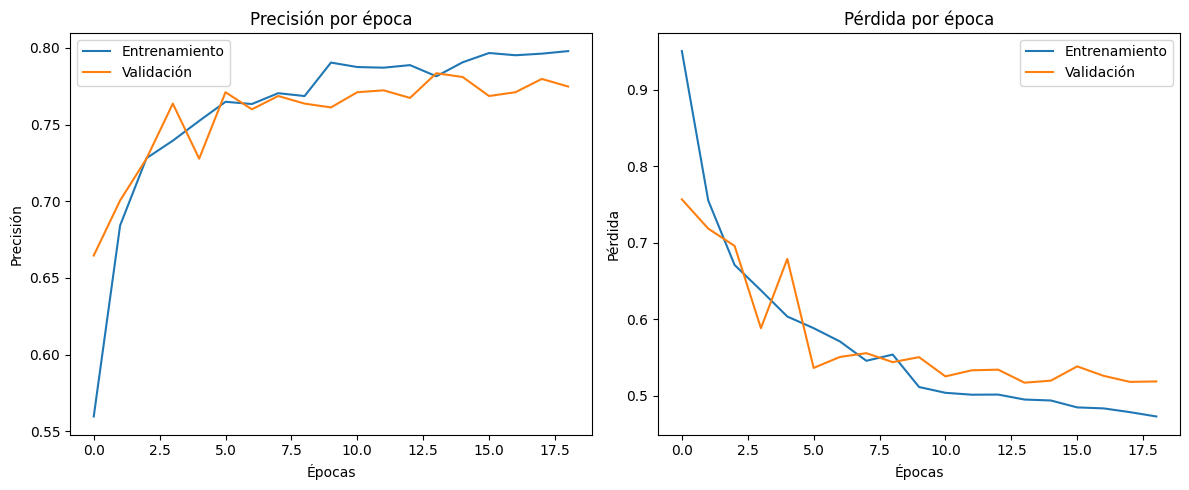

In [ ]:
import matplotlib.pyplot as plt # Importa la librería Matplotlib para crear gráficos.

def plot_training(history): # Define una función llamada 'plot_training' que toma el objeto 'history' (del model.fit())
    # Extrae los datos de precisión y pérdida del historial de entrenamiento
    acc = history.history['accuracy']     # Precisión en el conjunto de entrenamiento en cada época.
    val_acc = history.history['val_accuracy'] # Precisión en el conjunto de validación en cada época.
    loss = history.history['loss']       # Pérdida en el conjunto de entrenamiento en cada época.
    val_loss = history.history['val_loss']   # Pérdida en el conjunto de validación en cada época.

    plt.figure(figsize=(12, 5)) # Crea una figura grande para contener dos gráficos.

    # --- Primer Gráfico: Curva de Precisión ---
    plt.subplot(1, 2, 1) # Crea un subgráfico: 1 fila, 2 columnas, este es el 1ro.
    plt.plot(acc, label='Entrenamiento') # Dibuja la precisión del entrenamiento.
    plt.plot(val_acc, label='Validación') # Dibuja la precisión de la validación.
    plt.title('Precisión por época')     # Título del gráfico.
    plt.xlabel('Épocas')                 # Etiqueta del eje X.
    plt.ylabel('Precisión')              # Etiqueta del eje Y.
    plt.legend()                         # Muestra la leyenda (Entrenamiento/Validación).

    # --- Segundo Gráfico: Curva de Pérdida ---
    plt.subplot(1, 2, 2) # Crea el segundo subgráfico: 1 fila, 2 columnas, este es el 2do.
    plt.plot(loss, label='Entrenamiento') # Dibuja la pérdida del entrenamiento.
    plt.plot(val_loss, label='Validación') # Dibuja la pérdida de la validación.
    plt.title('Pérdida por época')       # Título del gráfico.
    plt.xlabel('Épocas')                   # Etiqueta del eje X.
    plt.ylabel('Pérdida')                # Etiqueta del eje Y.
    plt.legend()                           # Muestra la leyenda.

    plt.tight_layout() # Ajusta automáticamente los parámetros del subgráfico para que encajen en el área de la figura.
    plt.show()         # Muestra los gráficos.

# Mostrar curvas (Esto es cómo llamas a la función para que dibuje los gráficos)
plot_training(history) # Pasas el objeto 'history' que obtuviste de model.fit() a la función.

In [ ]:
model.save("modelo_neumonia_3.h5")
print("✅ Modelo guardado como 'modelo_neumonia.h5'")

✅ Modelo guardado como 'modelo_neumonia.h5'


Este bloque de código se encarga de cargar y preparar tus imágenes de prueba para que tu modelo de red neuronal pueda evaluarlas correctamente. Utiliza ImageDataGenerator de Keras, una herramienta muy útil para manejar grandes colecciones de imágenes que no caben en la memoria.

Preparación de Datos de Prueba con ImageDataGenerator

¿Qué hace este código en pocas palabras?
Este código crea un generador de datos (test_generator) que:

Encuentra tus imágenes de prueba: Busca en la carpeta test_dir subcarpetas que representan tus clases (por ejemplo, test/NORMAL/ y test/PNEUMONIA/).
Prepara las imágenes:
Normaliza los valores de los píxeles de cada imagen (de 0-255 a 0.0-1.0).
Redimensiona todas las imágenes al tamaño (224, 224) que espera tu red neuronal.
Entrega los datos en lotes: Cuando se le pide, no carga todas las imágenes a la vez (lo que podría agotar la memoria), sino que las entrega en lotes de 32 imágenes.
Codifica las etiquetas: Convierte las etiquetas de las clases a un formato que la red entiende (one-hot encoding).
Mantiene el orden: No mezcla las imágenes, lo cual es importante para la evaluación y análisis de resultados de prueba.
Este test_generator se pasará luego al método model.evaluate() o model.predict() para probar el rendimiento final de tu modelo entrenado.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Importa la clase ImageDataGenerator.

test_dir = "C:/Users/Javier/Desktop/Proyecto_Neumonia/data/chest_xray/test" # Define la ruta a la carpeta donde se encuentran tus imágenes de prueba.
                                                                           # Asegúrate de que esta ruta sea correcta en tu sistema.

datagen_test = ImageDataGenerator(rescale=1./255) # Crea una instancia de ImageDataGenerator para los datos de prueba.
                                                 # rescale=1./255: Es crucial. Normaliza los valores de los píxeles
                                                 #                de 0-255 a un rango de 0.0-1.0. Las redes neuronales
                                                 #                funcionan mucho mejor con estos valores normalizados.

test_generator = datagen_test.flow_from_directory( # Este método es la "magia" para cargar imágenes desde carpetas.
    test_dir,                                      # La ruta base donde están las subcarpetas de tus clases (ej. 'NORMAL', 'PNEUMONIA').
    target_size=(224, 224),                        # Redimensiona todas las imágenes a este tamaño. Debe coincidir con el
                                                   # tamaño de entrada esperado por tu modelo (el que definiste en `Input(shape=(224, 224, 3))`).
    batch_size=32,                                 # El número de imágenes que se procesarán en cada "lote" o "batch"
                                                   # durante la evaluación del modelo.
    class_mode='categorical',                      # Define cómo se codificarán las etiquetas de las clases.
                                                   # 'categorical' significa que las etiquetas se convertirán a formato
                                                   # one-hot encoding (ej., para 3 clases: [1,0,0], [0,1,0], [0,0,1]).
                                                   # Esto es necesario si tu capa de salida usa 'softmax' y tu función
                                                   # de pérdida es 'CategoricalCrossentropy'.
    shuffle=False                                  # Desactiva la mezcla de las imágenes. Para el conjunto de prueba,
                                                   # no queremos que los datos se mezclen, ya que necesitamos
                                                   # mantener un orden consistente para evaluar el modelo y,
                                                   # quizás, comparar predicciones con los nombres de archivo.
)

Found 624 images belonging to 3 classes.


Predicción y Preparación para la Evaluación
Qué hace este código en pocas palabras?
Predice: Usa tu modelo entrenado (model) para que genere predicciones sobre todas las imágenes del conjunto de prueba (test_generator).
Traduce Predicciones: Convierte las probabilidades que da el modelo (por ejemplo, "80% perro, 15% gato, 5% pájaro") en una única clase predicha (por ejemplo, "perro"), seleccionando la que tiene la probabilidad más alta.
Obtiene la Verdad: Recopila las etiquetas reales de las imágenes de prueba.
Nombra las Clases: Guarda los nombres de las clases (como 'NORMAL', 'PNEUMONIA') para que puedas entender los resultados (en lugar de solo ver números como 0, 1, 2).
Con y_pred (lo que el modelo predijo) y y_true (lo que realmente era), ahora tienes todo listo para calcular métricas de evaluación detalladas como la matriz de confusión, precisión, recall, F1-score, etc., y entender el rendimiento real de tu modelo.

In [ ]:
import numpy as np # Importa NumPy, una librería fundamental para operaciones numéricas en Python.

# Obtenemos las predicciones del modelo
predictions = model.predict(test_generator) # Le pide al modelo entrenado que haga predicciones sobre las imágenes del test_generator.
                                           # El test_generator entrega las imágenes en lotes y el modelo devuelve un array de probabilidades.
                                           # predictions contendrá algo como [[0.1, 0.2, 0.7], [0.9, 0.05, 0.05], ...]
                                           # donde cada sub-array son las probabilidades para las 3 clases.

y_pred = np.argmax(predictions, axis=1)    # Transforma las probabilidades de predicción en la clase predicha (el índice de la clase con la probabilidad más alta).
                                           # Por ejemplo, si predictions es [[0.1, 0.2, 0.7]], np.argmax(..., axis=1) devolverá 2 (el índice de 0.7).
                                           # y_pred será un array de enteros como [2, 0, 1, 2, ...], representando las clases predichas.

# Etiquetas verdaderas
y_true = test_generator.classes            # Obtiene las etiquetas verdaderas (las respuestas correctas) de las imágenes en el test_generator.
                                           # Estas son las clases reales a las que pertenece cada imagen en tu conjunto de prueba.
                                           # y_true será un array de enteros como [2, 0, 1, 1, ...], representando las clases reales.

# Nombres de las clases
class_names = list(test_generator.class_indices.keys()) # Obtiene los nombres de las clases (ej. 'NORMAL', 'PNEUMONIA')
                                                        # a partir del generador de datos. Esto es útil para imprimir resultados
                                                        # y entender qué representa cada índice numérico de clase.

c:\Users\Javier\.virtualenvs\LittleLemon-zoWj-mv7\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step



Evaluación Detallada del Modelo
Este código se encarga de importar las librerías necesarias para el análisis, y luego genera dos de los informes más importantes para evaluar un modelo de clasificación: el Reporte de Clasificación y la Matriz de Confusión.

Classification Report:
                     precision    recall  f1-score   support

BACTERIAL_PNEUMONIA       0.68      0.96      0.79       242
             NORMAL       0.96      0.50      0.66       234
    VIRAL_PNEUMONIA       0.58      0.63      0.60       148

           accuracy                           0.71       624
          macro avg       0.74      0.70      0.69       624
       weighted avg       0.76      0.71      0.70       624



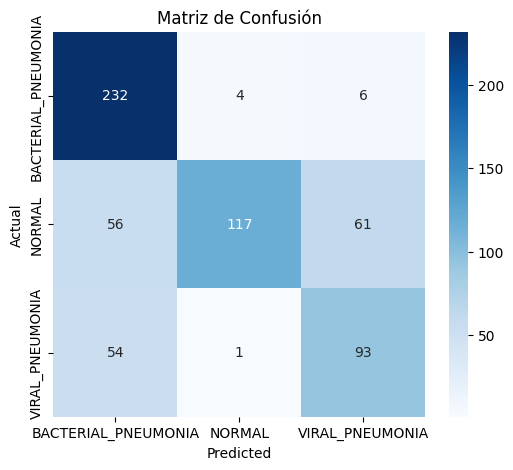

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix # Importa funciones clave para evaluación de modelos desde scikit-learn.
import seaborn as sns # Importa Seaborn, una librería para visualización de datos, ideal para matrices de confusión.
import matplotlib.pyplot as plt # Importa Matplotlib para crear y mostrar gráficos.

# --- Reporte detallado por clase ---
print("Classification Report:") # Imprime un título para el reporte.
print(classification_report(y_true, y_pred, target_names=class_names))
# 'classification_report': Genera un resumen de métricas clave (Precision, Recall, F1-Score, Support)
#                          para cada clase individualmente, y también el promedio general.
# 'y_true': Las etiquetas reales/verdaderas de tus datos de prueba (lo que son realmente las imágenes).
# 'y_pred': Las etiquetas predichas por tu modelo para esos mismos datos de prueba.
# 'target_names=class_names': Asigna los nombres de las clases (ej., 'NORMAL', 'PNEUMONIA') a los resultados
#                              para que el reporte sea fácil de leer y entender.

# --- Matriz de confusión ---
cm = confusion_matrix(y_true, y_pred) # 'confusion_matrix': Calcula una tabla que muestra cuántas predicciones
                                      #                   fueron correctas e incorrectas para cada clase.
                                      #                   Es la base para entender dónde el modelo se confunde.

plt.figure(figsize=(6, 5)) # Crea una figura para el gráfico, con un tamaño específico (ancho x alto).
sns.heatmap(cm, # 'heatmap': Dibuja la matriz de confusión como un mapa de calor visual.
            annot=True, # 'annot=True': Muestra los números de las celdas en el mapa de calor (el recuento de predicciones).
            fmt="d",    # 'fmt="d"': Formatea los números como enteros (dígitos).
            cmap="Blues", # 'cmap="Blues"': Elige un esquema de color azul para el mapa de calor.
            xticklabels=class_names, # 'xticklabels': Asigna los nombres de las clases a las etiquetas del eje X (predicciones).
            yticklabels=class_names) # 'yticklabels': Asigna los nombres de las clases a las etiquetas del eje Y (reales).
plt.xlabel("Predicted") # Etiqueta del eje X.
plt.ylabel("Actual")    # Etiqueta del eje Y.
plt.title("Matriz de Confusión") # Título del gráfico.
plt.show() # Muestra el gráfico generado.

Conclusiones Clave de Esta Matriz:
Fuerza en la Detección de BACTERIAL_PNEUMONIA (cuando es bacteriana): El modelo es bastante bueno identificando la neumonía bacteriana cuando realmente es esa clase (232 aciertos de 242 casos reales, si sumamos 232+4+6).
Mayor Problema: Clasificar NORMAL: El modelo tiene una alta tasa de falsos positivos para las clases de neumonía. Es decir, muchas imágenes normales son clasificadas incorrectamente como neumonía (56 como bacteriana, 61 como viral). Esto es lo más preocupante.
Confusión entre PNEUMONIA_BACTERIAL y PNEUMONIA_VIRAL: El modelo confunde significativamente la neumonía bacteriana con la viral y viceversa (6 casos de BACTERIAL como VIRAL, y 54 casos de VIRAL como BACTERIAL). Esto es un "falso negativo" para una subtipo de neumonía y un "falso positivo" para el otro, pero el diagnóstico general de "neumonía" se mantiene.
En resumen: Tu modelo parece ser más propenso a decir que hay neumonía (tanto bacteriana como viral) cuando en realidad no la hay (confundiendo normales con neumonías), y también tiene dificultades para distinguir entre los dos tipos de neumonía. El punto más crítico a mejorar sería reducir las clasificaciones erróneas de NORMAL a cualquier tipo de neumonía.

Resumen y Conclusiones del Reporte:
El reporte confirma lo que ya veíamos en la matriz de confusión:

- Muy buen recall para BACTERIAL_PNEUMONIA (0.96): El modelo es excelente en detectar los casos de neumonía bacteriana. Esto es bueno para no "perderse" casos de esta enfermedad.
- Pobre recall para NORMAL (0.50): Este es el principal problema. Tu modelo está clasificando erróneamente la mitad de las imágenes normales como neumonía (falsos positivos de neumonía). En un contexto médico, esto generaría muchas "alarmas falsas".
- Rendimiento moderado para VIRAL_PNEUMONIA: El modelo tiene un rendimiento decente, pero con espacio para mejorar, tanto en precisión como en recall.
- Confusiones Inter-Neumonía: Aunque no se ve directamente aquí, la combinación de precisiones más bajas y recalls más altos (o viceversa) para las clases de neumonía suele indicar que el modelo confunde los subtipos entre sí (bacteriana vs. viral).

Próximos pasos para mejorar: Enfocarse en reducir los falsos positivos para las clases de neumonía, es decir, mejorar el recall de la clase NORMAL. Esto podría implicar: más datos de entrenamiento para la clase NORMAL, más aumento de datos específicos, ajustar el umbral de decisión del clasificador, o reevaluar la función de pérdida si es un problema de costo de error.